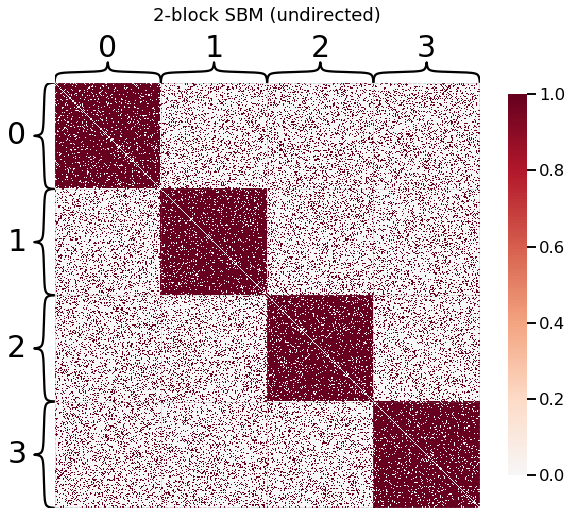

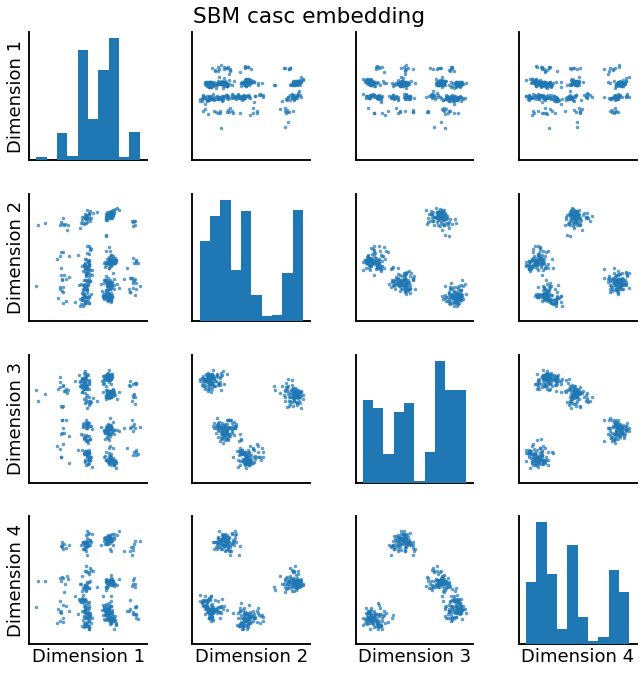

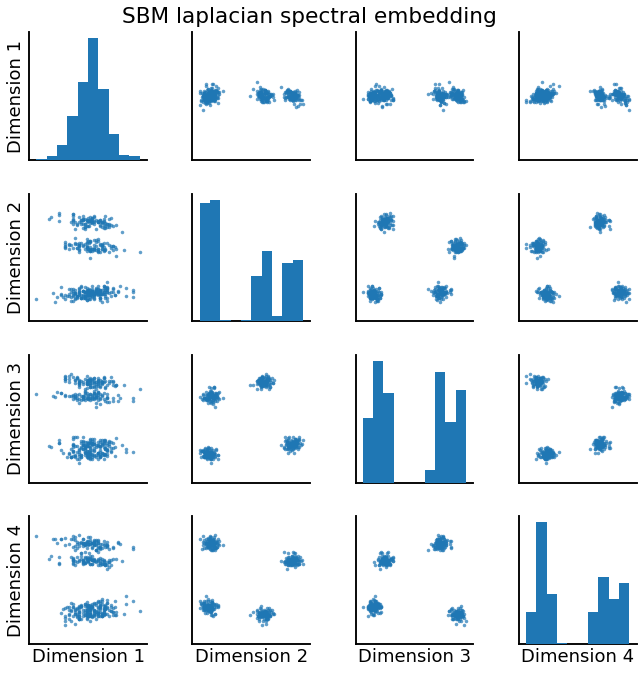

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 20 18:07:47 2019

@author: jerryyao
"""


import numpy as np
np.random.seed(8889)
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from graspy.embed import casc
from graspy.embed import LaplacianSpectralEmbed
from graspy.simulations import sbm
from graspy.plot import heatmap, pairplot
import graspy
from Casc import *
%matplotlib inline
n_verts = 100
labels_sbm = n_verts * [0] + n_verts * [1]+n_verts * [2]+n_verts * [3]
P = np.array([[0.9,0.2,0.2,0.2],[0.2,0.9,0.2,0.2],[0.2,0.2,0.9,0.2],[0.2,0.2,0.2,0.9]])
undirected_sbm = sbm(4 * [n_verts], P)
heatmap(undirected_sbm, title='2-block SBM (undirected)', inner_hier_labels=labels_sbm)
blockPMat=np.matrix([[0.8,0.2],[0.2,0.8]])
nMembers=[100,100,100,100]
covProbMat = np.matrix([[0.9,0.2,0.2,0.2],[0.2,0.9,0.2,0.2],[0.2,0.2,0.9,0.2],[0.2,0.2,0.2,0.9]])

covMat = simBernCovar.simBernCovar(covProbMat, nMembers)


ase = graspy.embed.casc.CovariateAssistedSpectralEmbed(n_components=4)
Xhat = ase.fit(undirected_sbm,covMat)
pairplot(Xhat['cascSvd'], title='SBM casc embedding')

lse =LaplacianSpectralEmbed(form='R-DAD',regularizer=1,n_components=4)
X1hat = lse.fit_transform(undirected_sbm)
pairplot(X1hat, title='SBM laplacian spectral embedding')

kmeansResults=KMeans(n_clusters=4).fit(X1hat)
labels=kmeansResults.labels_